## Projeto Análise Explotatória de Dados com Python

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# importando a base inicial

df =  pd.read_excel(r'C:\Users\victo\Downloads\Codigo+e+Datasets+-+Atualizado+20220807\Aula 4\train.xlsx')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

df['Fare'] = pd.to_numeric(df['Fare'], errors = 'coerce')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712833.00,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925.00,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,NaN,NaN,S


## 1 - Entendendo os tipos de variáveis que temos na base

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
# criando duas listas com nomes das colunas, uma para colunas qualitativas e outra para quantitativas

quali = []
quanti = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        quali.append(i)
    else: 
        quanti.append(i)

In [8]:
print('lista Quanti: ', quanti)
print('lista Quali: ', quali)

lista Quanti:  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
lista Quali:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


## 2 - Estatística Descritiva e Tabelas de Frequência

In [9]:
# Criando um dataframe para as variáveis quanti para fazer estatística descritiva

df_quanti = df[quanti]
df_quanti

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.25
1,2,1,1,38.0,1,0,712833.00
2,3,1,3,26.0,0,0,7925.00
3,4,1,1,35.0,1,0,53.10
4,5,0,3,35.0,0,0,NaN
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.00
887,888,1,1,19.0,0,0,30.00
888,889,0,3,NaN,1,2,23.45
889,890,1,1,26.0,0,0,30.00


In [10]:
df_quanti.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,706.000000,891.000000,891.000000,6.130000e+02
mean,446.000000,0.383838,2.308642,29.750949,0.523008,0.381594,1.655516e+05
std,257.353842,0.486592,0.836071,14.589877,1.102743,0.806057,4.903879e+05
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000e+00
25%,223.500000,0.000000,2.000000,20.000000,0.000000,0.000000,1.875000e+01
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,6.955000e+01
75%,668.500000,1.000000,3.000000,38.750000,1.000000,0.000000,1.132750e+05
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,5.123292e+06


In [11]:
df_quanti.median()

PassengerId    446.00
Survived         0.00
Pclass           3.00
Age             28.00
SibSp            0.00
Parch            0.00
Fare            69.55
dtype: float64

In [12]:
# Tabela de frequência para as variaveis qualitativas
# criando df quali

df_quali = df[quali]

# tabela de frequência para a variável Sex

df_quali.groupby('Sex').Name.count()

Sex
female    314
male      577
Name: Name, dtype: int64

In [13]:
# Fazendo todas as tabelas de frequência

for i in df_quali.columns:
    if i == 'Name':
        pass
    else:
        print('------------------')
        print('Variável: ', i)
        print(df_quali.groupby(i).Name.count())
        print('------------------')

------------------
Variável:  Sex
Sex
female    314
male      577
Name: Name, dtype: int64
------------------
------------------
Variável:  Ticket
Ticket
693            1
695            1
1601           7
2003           1
2223           1
              ..
W./C. 6608     4
W./C. 6609     1
W.E.P. 5734    1
W/C 14208      1
WE/P 5735      2
Name: Name, Length: 681, dtype: int64
------------------
------------------
Variável:  Cabin
Cabin
A10    1
A14    1
A16    1
A19    1
A20    1
      ..
F33    3
F38    1
F4     2
G6     4
T      1
Name: Name, Length: 147, dtype: int64
------------------
------------------
Variável:  Embarked
Embarked
C    168
Q     77
S    644
Name: Name, dtype: int64
------------------


## 3 - Detecção de Dados Nulos

In [14]:
# vizualizar quantos nulos temos em casa variável

nulos = pd.DataFrame()
nulos['Variável'] = df.columns

In [15]:
nulos

,Variável
0,PassengerId
1,Survived
2,Pclass
3,Name
4,Sex
5,Age
6,SibSp
7,Parch
8,Ticket
9,Fare


In [16]:
# Criando outra coluna com a quantidade de nulos

nulos['Quantidade'] = pd.Series()
nulos['Porcentagem'] = pd.Series()

for i in nulos.index:
    nulos.Quantidade[i] = df[nulos['Variável'][i]].isna().sum()
    nulos.Porcentagem[i] = (df[nulos['Variável'][i]].isna().sum()/df.PassengerId.count())*100

In [17]:
nulos

,Variável,Quantidade,Porcentagem
0,PassengerId,0,0.0
1,Survived,0,0.0
2,Pclass,0,0.0
3,Name,0,0.0
4,Sex,0,0.0
5,Age,185,20.763187
6,SibSp,0,0.0
7,Parch,0,0.0
8,Ticket,0,0.0
9,Fare,278,31.200898


## Qual estatégia usar?

### Variável "Cabin" com Vários Dados Vazios

### Na Variável "Age", Observamos Uma Quantidade Significativa de Dados Vazios (20%)

### Apenas na Variável "Embarked" Temos Poucos Dados Vazios (0,22%)

## O fazer?

### Remover as Linhas Vazias na Variável "Embarked"

### Para as Variáveis "Age" e "Cabin", Preencher os Dados Vazios

### "Age" é uma Variável Quantitativa (Podemos Usar a Média para Preenchê-la)

### "Cabin" é uma Variável Qualitativa (Podemos Usar a Moda para Preenchê-la)

In [18]:
# removendo as linhas da variavel Embarked

df2 = df.dropna(subset = ['Embarked'])

In [19]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712833.00,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925.00,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,NaN,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C


In [20]:
# preenchendo a variável Age
df3 = df2.copy()
df3.Age = df2.Age.fillna(df2.Age.mean())

In [21]:
df3.Age.isna().sum()

0

In [22]:
# preenchendo a variável Cabin

df4 = df3.copy()
print(df4.Cabin.mode())

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object


In [23]:
# Tem mais de uma Moda na variável Cabin
# escolher um valor dentro da moda e preencher aleatoriamente

moda = []
for i in df4.Cabin.mode().values:
    moda.append(i)

In [24]:
moda

['B96 B98', 'C23 C25 C27', 'G6']

In [25]:
# Preenchendo com valores aleatórios da moda

import random

df4.Cabin = df4.Cabin.fillna(random.choice(moda))


In [26]:
df4.Cabin.isna().sum()

0

In [27]:
df4.Fare = df3.Fare.fillna(df3.Fare.mean())
df4

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,G6,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,712833.000000,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7925.000000,G6,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,166093.233497,G6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.000000,G6,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.000000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.693423,1,2,W./C. 6607,23.450000,G6,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.000000,C148,C


In [28]:
df4.Fare.isna().sum()

0

## 4 - Detecção de Outliers

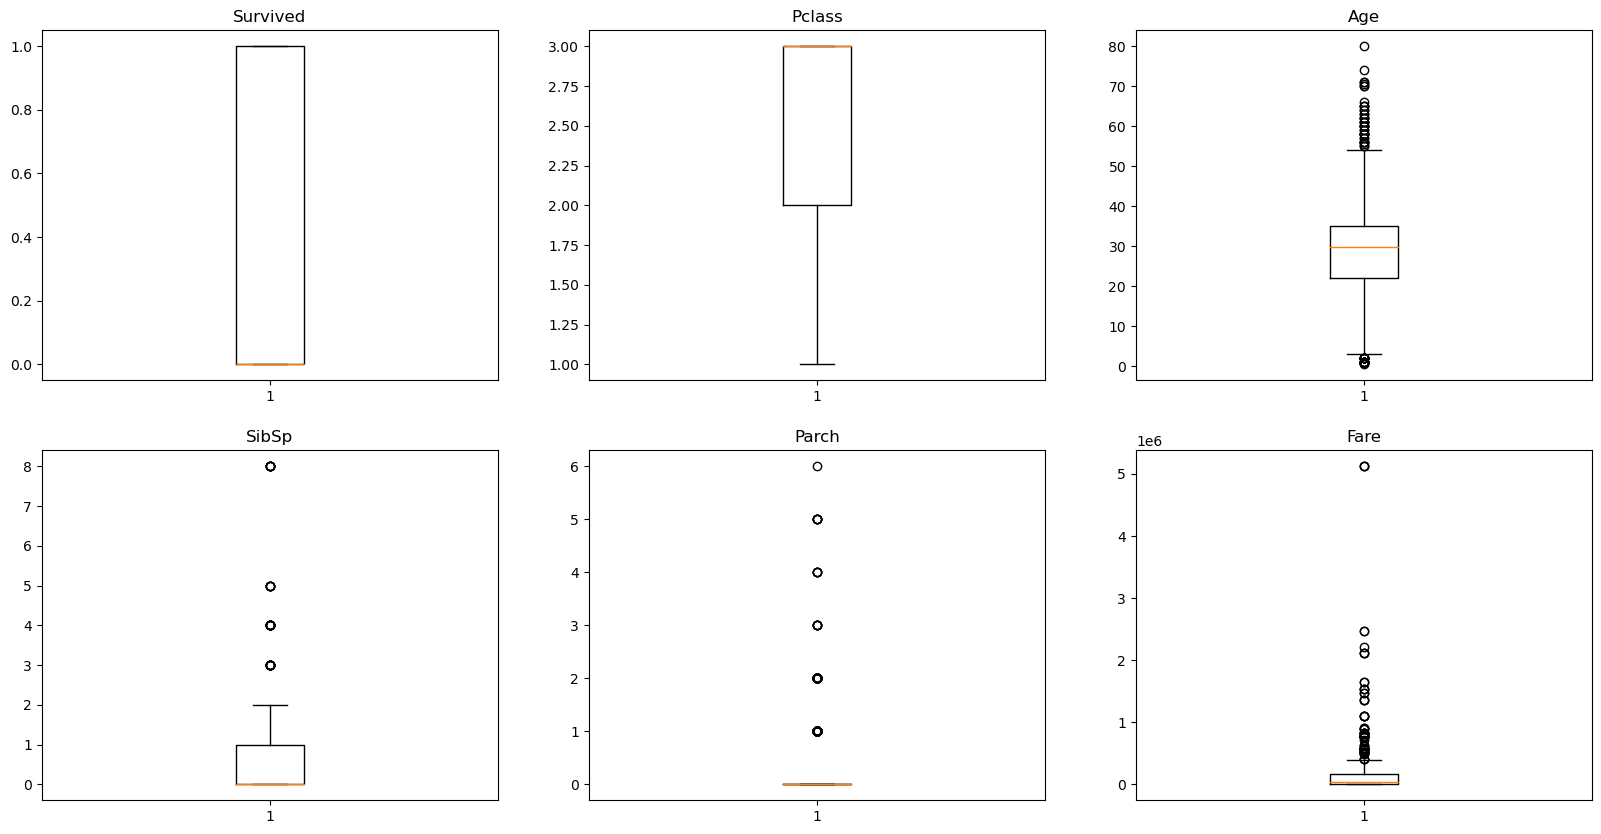

In [29]:
fig, axs = plt.subplots(2,3,figsize=(20,10))

axs[0,0].set_title('Survived')
axs[0,0].boxplot(df4.Survived)

axs[0,1].set_title('Pclass')
axs[0,1].boxplot(df4.Pclass)

axs[0,2].set_title('Age')
axs[0,2].boxplot(df4.Age)

axs[1,0].set_title('SibSp')
axs[1,0].boxplot(df4.SibSp)

axs[1,1].set_title('Parch')
axs[1,1].boxplot(df4.Parch)

axs[1,2].set_title('Fare')
axs[1,2].boxplot(df4.Fare)

plt.show()

## Algumas variáveis possui uma quantidade muito grande de outliers

## Analisar as variáveis calculando qual a % de outliers

In [30]:
# Calculo de Outliers

# Todos os pontos que estão fora do limite superior e inferios da amostra

# Limite superior = Q3 + 1,5 * DistanciaInterquartil
# Limite inferior = Q1 - 1,5 * DistanciaInterquartil

# Distancia Interquartil = valor do 3 quartil - valor do 1 quartil (Q3 - Q1)

# fazendo este cálculo para estas o dataframe todo (apenas o quantitativo)

df4_quanti = df4[quanti]
colunas = df4_quanti.columns
outliers = []

for i in df4_quanti.columns:
    q3 = np.quantile(df4_quanti[i], 0.75)
    q1 = np.quantile(df4_quanti[i], 0.25)
    dist = q3 - q1
    lim_inf = q1 - 1.5 * dist
    lim_sup = q3 + 1.5 * dist
    print('--------------')
    print(i)
    print(dist)
    print(lim_inf)
    print(lim_sup)
    print('--------------')
    
    outlier = 0
    
    for j in df4_quanti.index:
        if df4_quanti[i][j] < lim_inf:
            outlier = outlier + 1
        elif df4_quanti[i][j] > lim_sup:
            outlier = outlier + 1
        else: 
            pass
        
    outliers.append(outlier)
        
df_outlier = pd.DataFrame()
df_outlier['Variável'] = colunas
df_outlier['Outliers'] = outliers
df_outlier['Porcentagem'] = (outliers/df4_quanti.PassengerId.count()) * 100
    

--------------
PassengerId
444.0
-442.0
1334.0
--------------
--------------
Survived
1.0
-1.5
2.5
--------------
--------------
Pclass
1.0
0.5
4.5
--------------
--------------
Age
13.0
2.5
54.5
--------------
--------------
SibSp
1.0
-1.5
2.5
--------------
--------------
Parch
0.0
0.0
0.0
--------------
--------------
Fare
166066.68349689036
-249073.47524533555
415193.2587422259
--------------


In [31]:
df_outlier

,Variável,Outliers,Porcentagem
0,PassengerId,0,0.000000
1,Survived,0,0.000000
2,Pclass,0,0.000000
3,Age,65,7.311586
4,SibSp,46,5.174353
5,Parch,213,23.959505
6,Fare,72,8.098988


## No contexto das variáveis "Age" e "SibSp", observa-se que a quantidade de valores discrepantes (outliers) é minimamente influente. Portanto, é viável considerar a exclusão desses registros atípicos.

## Em relação às variáveis "Parch" e "Fare", é essencial avaliar a relevância destas no contexto do problema em análise, a fim de determinar a metodologia adequada para o tratamento dos outliers. Uma abordagem possível seria o estudo detalhado desses casos, potencialmente conduzindo à criação de um modelo analítico específico, que segmente e foque nesse grupo particular.

## Para a situação específica abordada neste estudo, optou-se por manter os outliers, mesmo estando eles claramente identificados, devido à sua relevância potencial para a análise.

## 5 - Visualização de Dados

## Análise Quantitativa dos Sobreviventes e Fatalidades no Desastre do Titanic

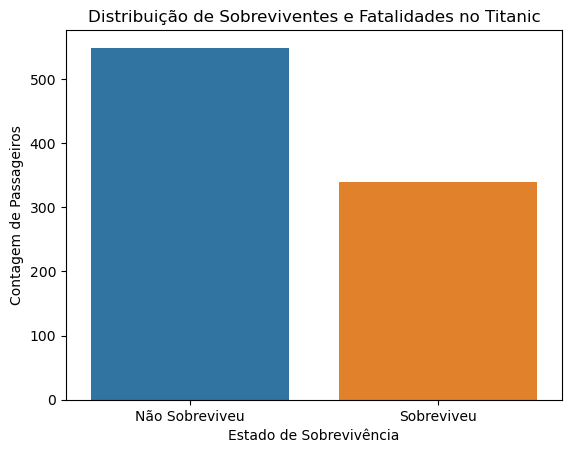

In [33]:
sns.countplot(x='Survived', data=df4)
plt.title('Distribuição de Sobreviventes e Fatalidades no Titanic')
plt.xlabel('Estado de Sobrevivência')
plt.ylabel('Contagem de Passageiros')
plt.xticks([0, 1], ['Não Sobreviveu', 'Sobreviveu'])
plt.show()

In [34]:
# Quantas pessoas morreram e sobreviveram, separadas por sexo

df4.groupby(['Survived', 'Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    231
          male      109
Name: Survived, dtype: int64

C:\Users\victo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


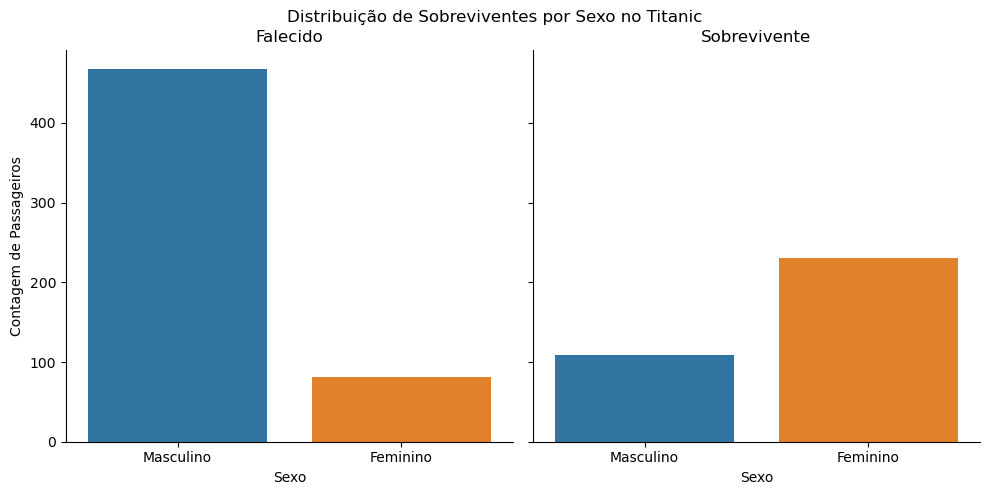

In [40]:
g = sns.catplot(x='Sex', col='Survived', kind='count', data=df4)

titles = ["Falecido", "Sobrevivente"]
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

g.set_axis_labels("Sexo", "Contagem de Passageiros")

g.set_xticklabels(["Masculino", "Feminino"])

plt.subplots_adjust(top=0.9) 
g.fig.suptitle('Distribuição de Sobreviventes por Sexo no Titanic')

plt.show()

## Os dados analisados sugerem que as mulheres apresentaram uma taxa de sobrevivência significativamente maior em comparação aos homens.

## --------------------------------------------------------------------------------------------------------------------------------

## Análise da Influência da Classe de Viagem na Taxa de Sobrevivência dos Passageiros.

C:\Users\victo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


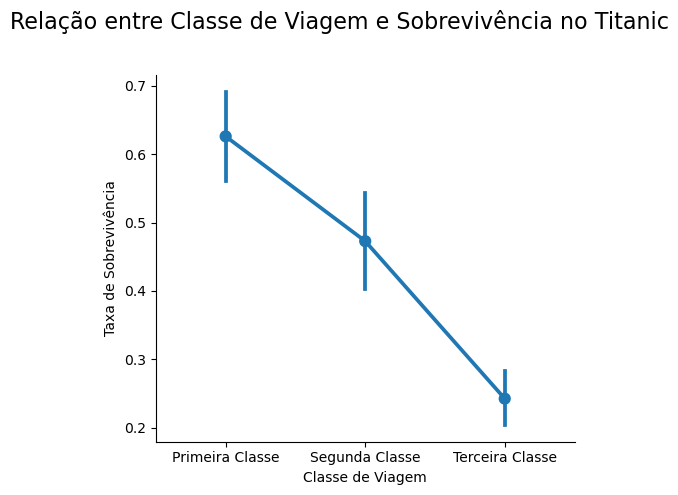

In [44]:
a = sns.catplot(x='Pclass', y='Survived', kind='point', data=df4)

a.fig.suptitle('Relação entre Classe de Viagem e Sobrevivência no Titanic', fontsize=16)

plt.subplots_adjust(top=0.85)

a.set_axis_labels('Classe de Viagem', 'Taxa de Sobrevivência')

a.set_xticklabels(['Primeira Classe', 'Segunda Classe', 'Terceira Classe'])

plt.show()

C:\Users\victo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


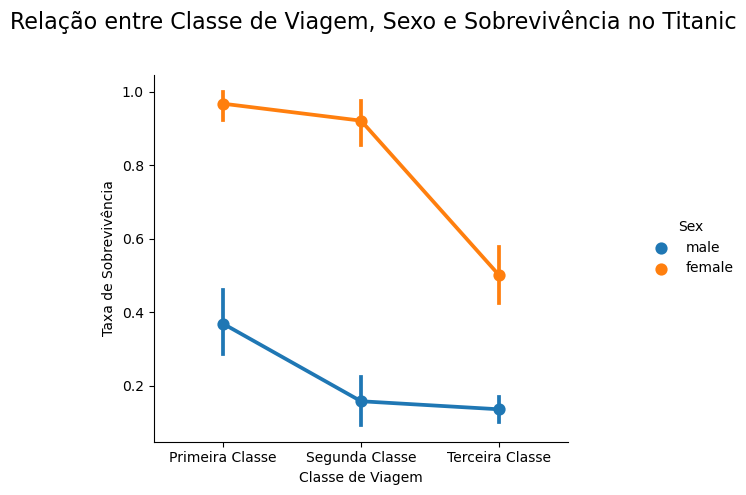

In [48]:
b = sns.catplot(x='Pclass', y='Survived',hue= 'Sex',kind='point', data=df4)

b.fig.suptitle('Relação entre Classe de Viagem, Sexo e Sobrevivência no Titanic', fontsize=16)

plt.subplots_adjust(top=0.85)

b.set_xticklabels(['Primeira Classe', 'Segunda Classe', 'Terceira Classe'])

b.set_axis_labels('Classe de Viagem', 'Taxa de Sobrevivência')

plt.show()

## Os dados sugerem que, para ambos os sexos, a probabilidade de não sobreviver era inversamente proporcional à classe de viagem, sendo esta tendência mais acentuada entre as mulheres. Portanto, observou-se que indivíduos em classes inferiores tinham uma maior probabilidade de não sobreviver, com uma diferença notavelmente maior no caso das passageiras femininas.

## -------------------------------------------------------------------------------------------------------------------------

## Análise do Impacto do Ponto de Embarque na Sobrevivência dos Passageiros.

### C = Cherbourg, Q = Queenstown, S = Southampton

C:\Users\victo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


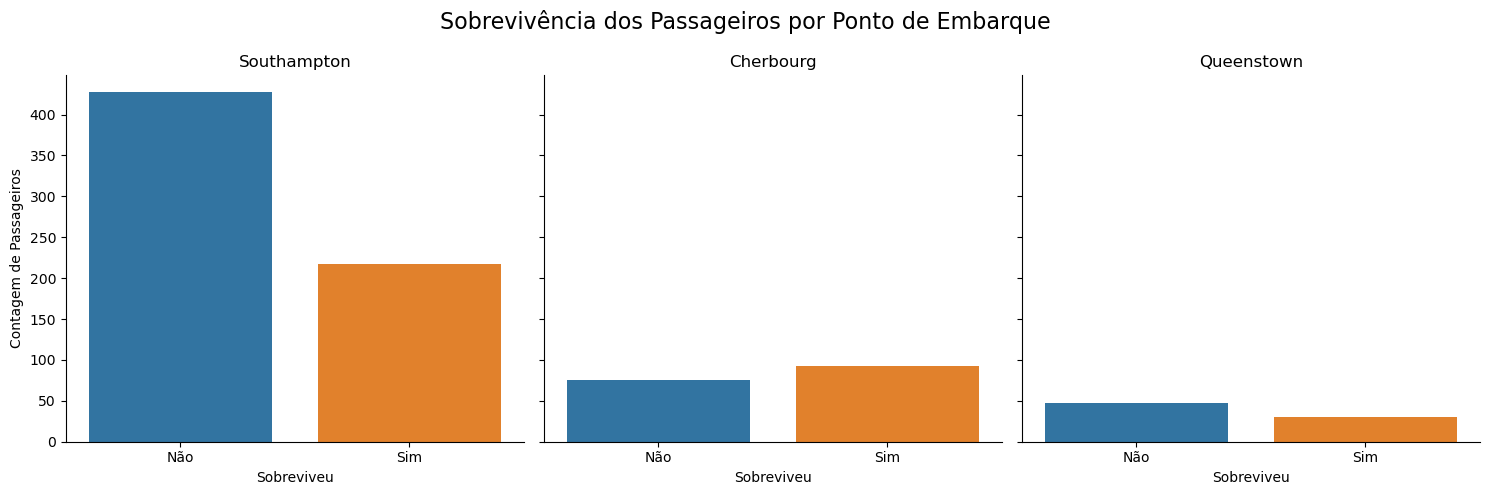

In [51]:
c = sns.catplot(x='Survived', col= 'Embarked', kind = 'count', data=df4)

c.fig.suptitle('Sobrevivência dos Passageiros por Ponto de Embarque', fontsize=16)

plt.subplots_adjust(top=0.85)

embark_titles = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}
for i, ax in enumerate(c.axes.flat):
    ax.set_title(embark_titles.get(c.col_names[i], c.col_names[i]))

c.set_axis_labels('Sobreviveu', 'Contagem de Passageiros')

c.set_xticklabels(['Não', 'Sim'])

plt.show()

## Análise da Influência da Idade na Sobrevivência dos Passageiros.

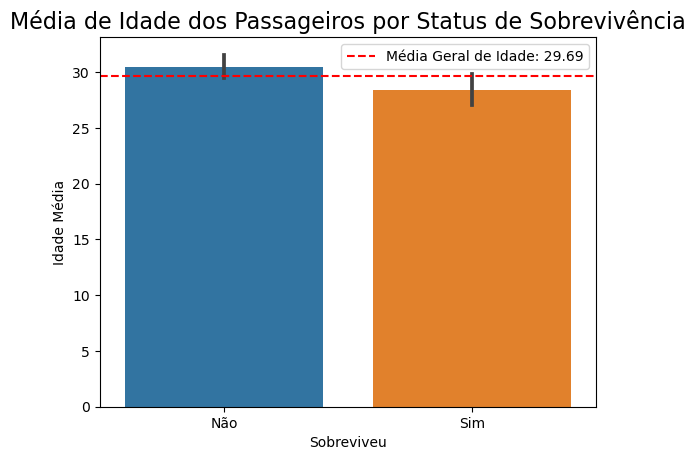

In [53]:
sns.barplot(x='Survived', y='Age', data=df4)

plt.title('Média de Idade dos Passageiros por Status de Sobrevivência', fontsize=16)

plt.xlabel('Sobreviveu')

plt.ylabel('Idade Média')

plt.xticks([0, 1], ['Não', 'Sim'])

media_idade = df4['Age'].mean()
plt.axhline(y=media_idade, color='r', linestyle='--', label=f'Média Geral de Idade: {media_idade:.2f}')
plt.legend()

plt.show()

## Análise da Correlação entre Todas as Variáveis do Conjunto de Dados.

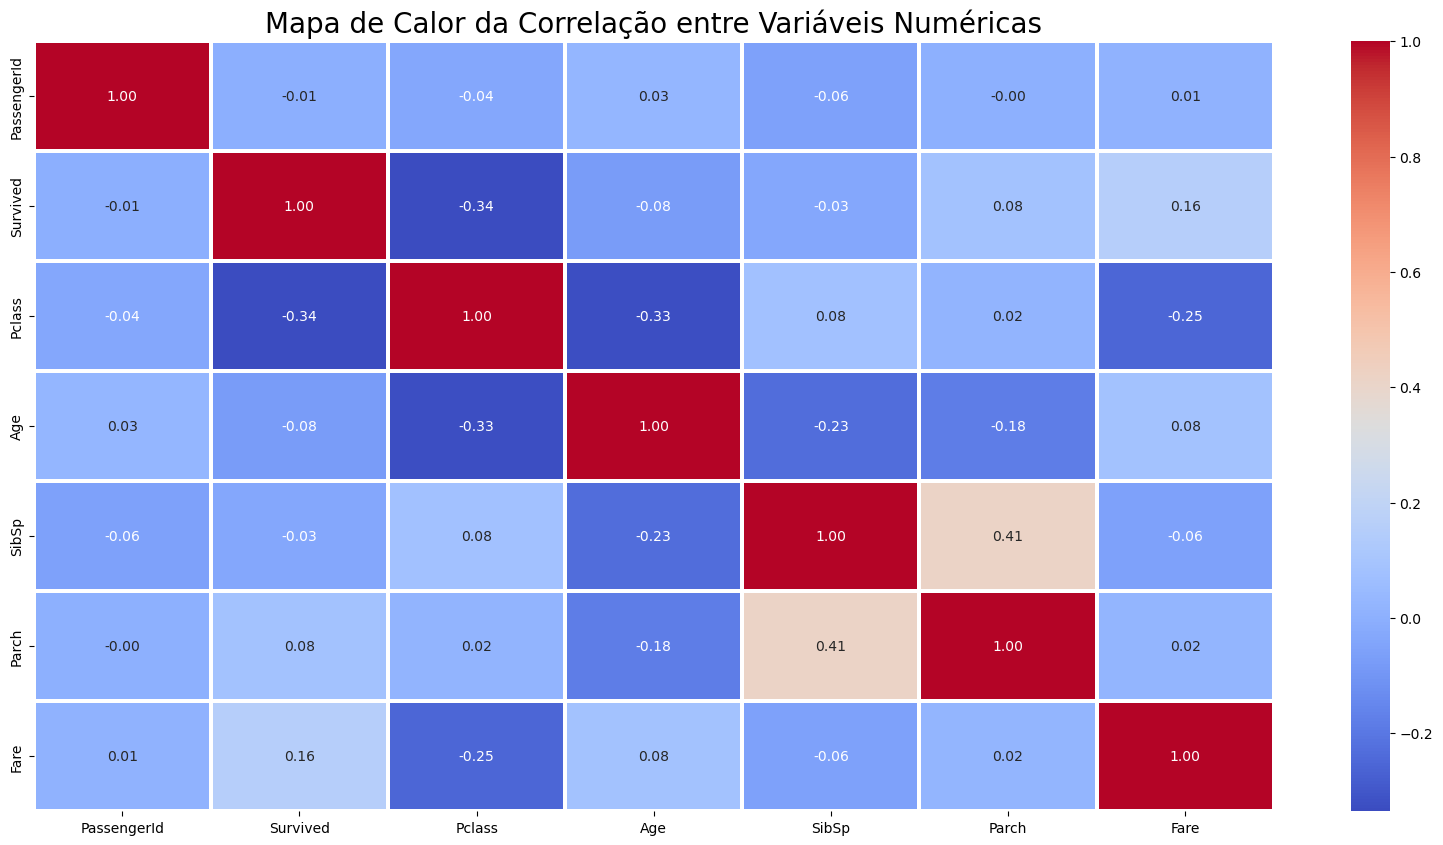

In [55]:
df_numeric = df4.select_dtypes(include=[np.number])

plt.figure(figsize=(20, 10))

sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', linewidths=1.5, fmt='.2f')

plt.title('Mapa de Calor da Correlação entre Variáveis Numéricas', fontsize=20)

plt.show()

## "O mapa de calor apresentado aqui é uma ferramenta visual crucial na análise de correlações entre variáveis numéricas em nosso conjunto de dados. Cada célula do mapa mostra o coeficiente de correlação entre as variáveis representadas pelos respectivos eixos horizontal e vertical. Este coeficiente varia de -1 a +1, onde +1 indica uma correlação positiva perfeita, -1 indica uma correlação negativa perfeita, e 0 implica ausência de correlação.

## Particularmente, os valores '1.00' ao longo da diagonal principal do mapa são notáveis. Eles representam a correlação de uma variável com ela mesma, que é sempre perfeita, daí o coeficiente de '1.00'. Esses valores são um aspecto padrão e esperado em qualquer mapa de calor de correlação, servindo como uma referência para comparação com outras células.

## Analisar este mapa de calor nos permite identificar rapidamente quais variáveis estão mais fortemente relacionadas entre si, o que é fundamental para compreender a estrutura e as dinâmicas subjacentes aos nossos dados. Por exemplo, uma correlação alta (próxima de +1 ou -1) entre duas variáveis pode indicar uma relação forte, o que pode ser um insight valioso para modelagens preditivas e outras análises estatísticas."